# Linear Probe Results Analysis

This notebook analyzes the linear probing results from SimCLR experiments on CIFAR-10.

**Experiment Setup:**
- 3 Encoders: ResNet18, ViT (4x4 patches), MLP
- 3 Augmentation Modes: all, crop, all-no-crop
- 5 runs per configuration
- Linear probe: 100 epochs, SGD with lr=0.1

In [5]:
import os
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Set style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('husl')

## 1. Load Results

In [6]:
# Configuration
RESULTS_DIR = './experiment_results'  # Change to 'experiment_results_adjusted' for adjusted InfoNCE
ENCODERS = ['resnet', 'vit', 'mlp']
AUG_MODES = ['all', 'crop', 'all-no-crop']
NUM_RUNS = 5

# Collect results
results = []
warnings = []

for encoder in ENCODERS:
    for aug_mode in AUG_MODES:
        completed_runs = 0
        for run in range(1, NUM_RUNS + 1):
            exp_dir = Path(RESULTS_DIR) / encoder / aug_mode / f'run_{run}'
            summary_file = exp_dir / 'linear_probe_summary.json'
            
            print(summary_file)

            if summary_file.exists():
                with open(summary_file, 'r') as f:
                    summary = json.load(f)
                
                results.append({
                    'encoder': encoder,
                    'aug_mode': aug_mode,
                    'run': run,
                    'best_test_acc': summary.get('best_test_acc', None),
                    'final_test_acc': summary.get('final_test_acc', None),
                    'final_train_acc': summary.get('final_train_acc', None),
                    'total_epochs': summary.get('total_epochs', None)
                })
                completed_runs += 1
        
        # Track warnings for incomplete configurations
        if completed_runs == 0:
            warnings.append(f"⚠️ {encoder}/{aug_mode}: NO completed runs (skipping)")
        elif completed_runs < NUM_RUNS:
            warnings.append(f"⚠️ {encoder}/{aug_mode}: Only {completed_runs}/{NUM_RUNS} runs completed")

# Create DataFrame
df = pd.DataFrame(results)

print(f"Loaded {len(df)} experiment results")
print(f"\nResults directory: {RESULTS_DIR}")
print()

# Show warnings
if warnings:
    print("=" * 60)
    print("WARNINGS - Incomplete Data:")
    print("=" * 60)
    for w in warnings:
        print(w)
    print("=" * 60)
else:
    print("✓ All configurations have complete data (5/5 runs each)")

experiment_results/resnet/all/run_1/linear_probe_summary.json
experiment_results/resnet/all/run_2/linear_probe_summary.json
experiment_results/resnet/all/run_3/linear_probe_summary.json
experiment_results/resnet/all/run_4/linear_probe_summary.json
experiment_results/resnet/all/run_5/linear_probe_summary.json
experiment_results/resnet/crop/run_1/linear_probe_summary.json
experiment_results/resnet/crop/run_2/linear_probe_summary.json
experiment_results/resnet/crop/run_3/linear_probe_summary.json
experiment_results/resnet/crop/run_4/linear_probe_summary.json
experiment_results/resnet/crop/run_5/linear_probe_summary.json
experiment_results/resnet/all-no-crop/run_1/linear_probe_summary.json
experiment_results/resnet/all-no-crop/run_2/linear_probe_summary.json
experiment_results/resnet/all-no-crop/run_3/linear_probe_summary.json
experiment_results/resnet/all-no-crop/run_4/linear_probe_summary.json
experiment_results/resnet/all-no-crop/run_5/linear_probe_summary.json
experiment_results/vit/al

In [8]:
# Display raw data
if len(df) > 0:
    display(df)
else:
    print("No data to display!")

,encoder,aug_mode,run,best_test_acc,final_test_acc,final_train_acc,total_epochs
0,resnet,all,1,54.30,54.23,53.080,100
1,resnet,all,2,54.70,54.70,53.920,100
2,resnet,all,3,54.40,54.02,53.942,100
3,resnet,all,4,57.09,55.80,56.860,100
4,resnet,all,5,56.49,56.01,55.718,100
5,resnet,crop,1,37.60,36.69,37.138,100
6,resnet,crop,2,36.87,36.87,36.590,100
7,resnet,crop,3,37.82,37.04,37.322,100
8,resnet,crop,4,37.16,36.28,36.804,100
9,resnet,crop,5,36.64,35.81,36.054,100


## 2. Summary Statistics

In [9]:
if len(df) > 0:
    # Compute summary statistics
    summary_stats = df.groupby(['encoder', 'aug_mode']).agg({
        'best_test_acc': ['mean', 'std', 'count'],
        'final_test_acc': ['mean', 'std']
    }).round(2)
    
    summary_stats.columns = ['_'.join(col).strip() for col in summary_stats.columns.values]
    summary_stats = summary_stats.rename(columns={
        'best_test_acc_mean': 'Best Acc (Mean)',
        'best_test_acc_std': 'Best Acc (Std)',
        'best_test_acc_count': 'N Runs',
        'final_test_acc_mean': 'Final Acc (Mean)',
        'final_test_acc_std': 'Final Acc (Std)'
    })
    
    print("Summary Statistics (Best Test Accuracy):")
    display(summary_stats)
else:
    print("No data available for summary statistics.")

Summary Statistics (Best Test Accuracy):


Best Acc (Mean)  Best Acc (Std)  N Runs  \
encoder aug_mode                                               
mlp     all                    42.25            0.88       5   
        all-no-crop            32.96            0.18       5   
        crop                   39.92            0.11       5   
resnet  all                    55.40            1.30       5   
        all-no-crop            35.53            0.59       5   
        crop                   37.22            0.49       5   

                     Final Acc (Mean)  Final Acc (Std)  
encoder aug_mode                                        
mlp     all                     41.01             1.06  
        all-no-crop             32.47             0.37  
        crop                    39.41             0.32  
resnet  all                     54.95             0.91  
        all-no-crop             35.16             0.63  
        crop                    36.54             0.50

## 3. Heatmap: Encoder vs Augmentation Mode

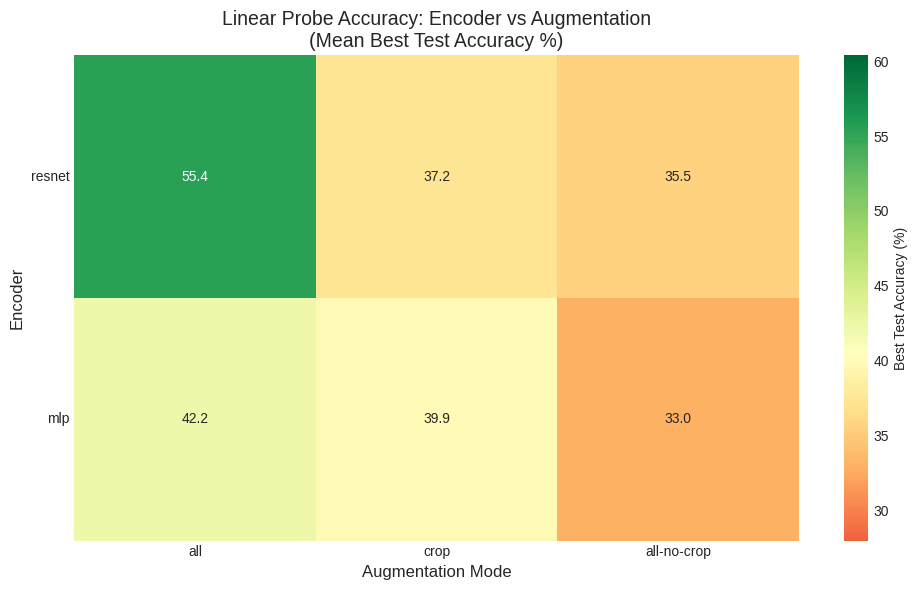


Heatmap saved to: linear_probe_heatmap.png


In [10]:
if len(df) > 0:
    # Create pivot table for heatmap
    heatmap_data = df.groupby(['encoder', 'aug_mode'])['best_test_acc'].mean().unstack()
    
    # Reorder columns and rows for better visualization
    col_order = [m for m in AUG_MODES if m in heatmap_data.columns]
    row_order = [e for e in ENCODERS if e in heatmap_data.index]
    heatmap_data = heatmap_data.reindex(index=row_order, columns=col_order)
    
    # Count runs for annotation
    run_counts = df.groupby(['encoder', 'aug_mode'])['run'].count().unstack()
    run_counts = run_counts.reindex(index=row_order, columns=col_order)
    
    # Create figure
    fig, ax = plt.subplots(figsize=(10, 6))
    
    # Create heatmap
    sns.heatmap(
        heatmap_data,
        annot=True,
        fmt='.1f',
        cmap='RdYlGn',
        center=heatmap_data.mean().mean(),
        vmin=heatmap_data.min().min() - 5,
        vmax=heatmap_data.max().max() + 5,
        ax=ax,
        cbar_kws={'label': 'Best Test Accuracy (%)'}
    )
    
    # Add run count annotations
    for i, encoder in enumerate(row_order):
        for j, aug_mode in enumerate(col_order):
            count = run_counts.loc[encoder, aug_mode] if pd.notna(run_counts.loc[encoder, aug_mode]) else 0
            if count < NUM_RUNS:
                ax.text(j + 0.5, i + 0.85, f'n={int(count)}', 
                       ha='center', va='center', fontsize=8, color='gray')
    
    ax.set_xlabel('Augmentation Mode', fontsize=12)
    ax.set_ylabel('Encoder', fontsize=12)
    ax.set_title('Linear Probe Accuracy: Encoder vs Augmentation\n(Mean Best Test Accuracy %)', fontsize=14)
    
    # Improve labels
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
    ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
    
    plt.tight_layout()
    plt.savefig('linear_probe_heatmap.png', dpi=150, bbox_inches='tight')
    plt.show()
    
    print("\nHeatmap saved to: linear_probe_heatmap.png")
else:
    print("No data available for heatmap.")

## 4. Bar Plot with Error Bars

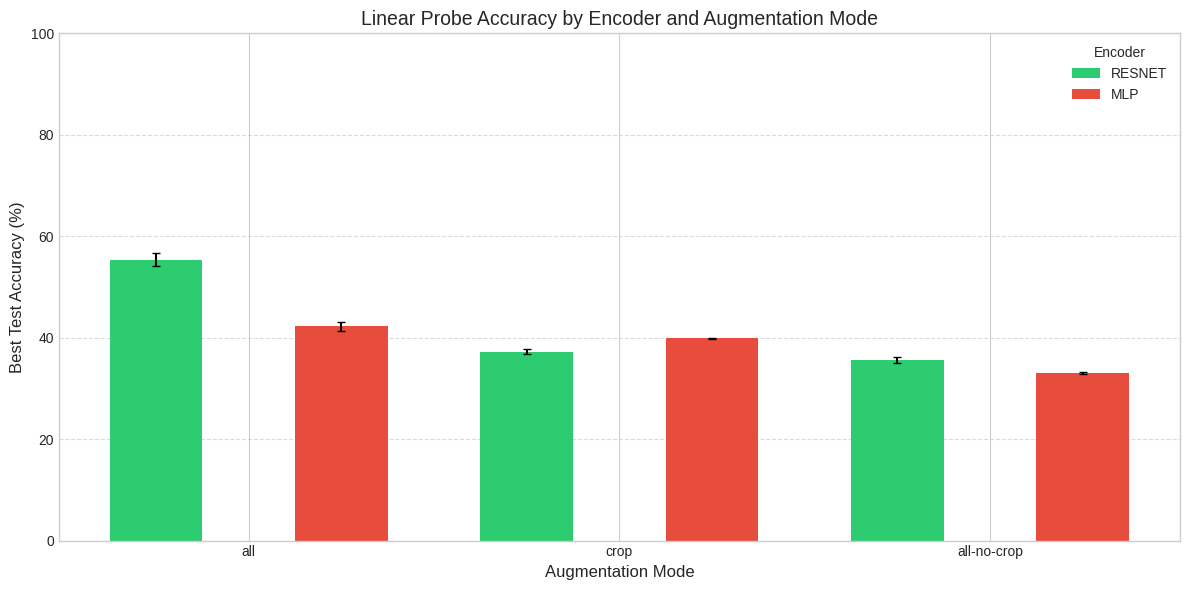


Bar plot saved to: linear_probe_barplot.png


In [11]:
if len(df) > 0:
    fig, ax = plt.subplots(figsize=(12, 6))
    
    # Prepare data
    plot_data = df.groupby(['encoder', 'aug_mode']).agg({
        'best_test_acc': ['mean', 'std']
    }).reset_index()
    plot_data.columns = ['encoder', 'aug_mode', 'mean', 'std']
    plot_data['std'] = plot_data['std'].fillna(0)
    
    # Create grouped bar plot
    x = np.arange(len(AUG_MODES))
    width = 0.25
    
    colors = {'resnet': '#2ecc71', 'vit': '#3498db', 'mlp': '#e74c3c'}
    
    for i, encoder in enumerate(ENCODERS):
        encoder_data = plot_data[plot_data['encoder'] == encoder]
        if len(encoder_data) > 0:
            # Match order of aug_modes
            means = []
            stds = []
            for aug in AUG_MODES:
                row = encoder_data[encoder_data['aug_mode'] == aug]
                if len(row) > 0:
                    means.append(row['mean'].values[0])
                    stds.append(row['std'].values[0])
                else:
                    means.append(0)
                    stds.append(0)
            
            ax.bar(x + i * width, means, width, 
                   label=encoder.upper(), 
                   yerr=stds,
                   capsize=3,
                   color=colors.get(encoder, 'gray'))
    
    ax.set_xlabel('Augmentation Mode', fontsize=12)
    ax.set_ylabel('Best Test Accuracy (%)', fontsize=12)
    ax.set_title('Linear Probe Accuracy by Encoder and Augmentation Mode', fontsize=14)
    ax.set_xticks(x + width)
    ax.set_xticklabels(AUG_MODES)
    ax.legend(title='Encoder')
    ax.set_ylim(0, 100)
    
    # Add grid
    ax.yaxis.grid(True, linestyle='--', alpha=0.7)
    ax.set_axisbelow(True)
    
    plt.tight_layout()
    plt.savefig('linear_probe_barplot.png', dpi=150, bbox_inches='tight')
    plt.show()
    
    print("\nBar plot saved to: linear_probe_barplot.png")
else:
    print("No data available for bar plot.")

## 5. Per-Run Results (Box Plot)

In [ ]:
if len(df) > 0:
    from matplotlib.patches import FancyBboxPatch, Rectangle, Circle, Ellipse
    import matplotlib.gridspec as gridspec
    from matplotlib.lines import Line2D
    from matplotlib.patches import Patch
    
    # Premium styling
    plt.rcParams.update({
        'font.family': 'sans-serif',
        'font.sans-serif': ['Helvetica Neue', 'Arial', 'DejaVu Sans'],
        'font.size': 11,
        'axes.spines.top': False,
        'axes.spines.right': False,
        'figure.dpi': 150,
        'savefig.dpi': 300,
    })
    
    # Create figure with elegant proportions
    fig = plt.figure(figsize=(16, 8), facecolor='white')
    
    # Grid layout
    gs = gridspec.GridSpec(1, 3, width_ratios=[1, 1, 1], wspace=0.25,
                           left=0.07, right=0.97, top=0.85, bottom=0.15)
    
    # Refined color palettes - softer, more sophisticated
    encoder_config = {
        'resnet': {
            'main': '#6366f1',      # Indigo
            'dark': '#4338ca',
            'light': '#c7d2fe',
            'bg': '#eef2ff',
            'accent': '#f59e0b',    # Amber
            'title': 'ResNet-18'
        },
        'vit': {
            'main': '#10b981',      # Emerald
            'dark': '#059669',
            'light': '#a7f3d0',
            'bg': '#ecfdf5',
            'accent': '#f59e0b',
            'title': 'ViT'
        },
        'mlp': {
            'main': '#f43f5e',      # Rose
            'dark': '#e11d48',
            'light': '#fecdd3',
            'bg': '#fff1f2',
            'accent': '#f59e0b',
            'title': 'MLP'
        }
    }
    
    aug_labels = {'all': 'Full Aug.', 'crop': 'Crop Only', 'all-no-crop': 'No Crop'}
    
    axes = []
    for idx, encoder in enumerate(ENCODERS):
        ax = fig.add_subplot(gs[idx])
        axes.append(ax)
        
        config = encoder_config[encoder]
        encoder_data = df[df['encoder'] == encoder]
        
        ax.set_facecolor('white')
        
        if len(encoder_data) > 0:
            order = [m for m in AUG_MODES if m in encoder_data['aug_mode'].values]
            
            for i, aug in enumerate(order):
                aug_data = encoder_data[encoder_data['aug_mode'] == aug]['best_test_acc']
                mean_val = aug_data.mean()
                std_val = aug_data.std()
                
                # Soft background pill for each group
                pill = FancyBboxPatch(
                    (i - 0.35, 26), 0.7, 42,
                    boxstyle="round,pad=0.02,rounding_size=0.3",
                    facecolor=config['bg'],
                    edgecolor='none',
                    alpha=0.7,
                    zorder=1
                )
                ax.add_patch(pill)
                
                # Std deviation band - elegant rounded rectangle
                std_band = FancyBboxPatch(
                    (i - 0.22, mean_val - std_val),
                    0.44, std_val * 2,
                    boxstyle="round,pad=0.01,rounding_size=0.1",
                    facecolor=config['light'],
                    edgecolor=config['main'],
                    linewidth=1.5,
                    alpha=0.6,
                    zorder=3
                )
                ax.add_patch(std_band)
                
                # Individual points with premium styling
                np.random.seed(42 + i + idx*10)
                jitter = np.random.uniform(-0.08, 0.08, size=len(aug_data))
                
                # Shadow layer
                ax.scatter(
                    i + jitter + 0.02, aug_data.values - 0.3,
                    s=160, c='#00000015', edgecolors='none', zorder=4
                )
                
                # Main points with gradient-like effect
                ax.scatter(
                    i + jitter, aug_data,
                    s=160, c=config['accent'],
                    edgecolors='white', linewidth=2.5,
                    alpha=1.0, zorder=6
                )
                
                # Mean indicator - horizontal line
                ax.hlines(mean_val, i - 0.18, i + 0.18,
                         colors=config['dark'], linewidth=3, zorder=7)
                
                # Annotation with clean styling
                ax.annotate(
                    f'{mean_val:.1f}%',
                    xy=(i, mean_val + std_val + 1.5),
                    ha='center', va='bottom',
                    fontsize=15, fontweight='bold',
                    color=config['dark'],
                    zorder=10
                )
                ax.annotate(
                    f'±{std_val:.1f}',
                    xy=(i, mean_val + std_val + 0.3),
                    ha='center', va='bottom',
                    fontsize=9, fontweight='normal',
                    color='#6b7280',
                    zorder=10
                )
        
        # Axis styling
        ax.set_xlim(-0.55, len(order) - 0.45)
        ax.set_ylim(26, 68)
        ax.set_xticks(range(len(order)))
        ax.set_xticklabels([aug_labels.get(m, m) for m in order],
                          fontsize=12, color='#374151', fontweight='medium')
        ax.set_yticks([30, 40, 50, 60])
        
        if idx == 0:
            ax.set_ylabel('Test Accuracy (%)', fontsize=14, fontweight='bold',
                         color='#1f2937', labelpad=12)
        
        ax.tick_params(axis='y', labelsize=11, colors='#6b7280', length=0)
        ax.tick_params(axis='x', length=0, pad=8)
        
        # Minimal spines
        ax.spines['left'].set_visible(False)
        ax.spines['bottom'].set_color('#e5e7eb')
        ax.spines['bottom'].set_linewidth(2)
        
        # Subtle horizontal guides
        for y in [30, 40, 50, 60]:
            ax.axhline(y=y, color='#f3f4f6', linewidth=1, zorder=0)
        
        # Title with accent bar
        ax.set_title(config['title'], fontsize=18, fontweight='bold',
                    color='#111827', pad=15, loc='center')
        
        # Colored accent line under title
        title_line = ax.axhline(y=68.5, xmin=0.25, xmax=0.75,
                               color=config['main'], linewidth=4,
                               solid_capstyle='round', clip_on=False)
    
    # Main title
    fig.suptitle('Linear Probe Accuracy by Architecture',
                fontsize=22, fontweight='bold', color='#111827',
                y=0.95, x=0.52)
    
    # Subtitle
    fig.text(0.52, 0.905, 'CIFAR-10 · SimCLR · 5 runs per configuration',
            ha='center', fontsize=12, color='#6b7280', style='italic')
    
    # Legend
    legend_elements = [
        Line2D([0], [0], marker='o', color='w', markerfacecolor='#f59e0b',
               markersize=11, markeredgecolor='white', markeredgewidth=2,
               label='Individual runs'),
        Line2D([0], [0], color='#4338ca', linewidth=3,
               solid_capstyle='round', label='Mean'),
        Patch(facecolor='#c7d2fe', edgecolor='#6366f1', linewidth=1.5,
              alpha=0.6, label='±1 std'),
    ]
    
    leg = fig.legend(handles=legend_elements, loc='lower center',
                    bbox_to_anchor=(0.52, 0.02), ncol=3,
                    frameon=True, fancybox=True,
                    fontsize=11, handletextpad=0.5,
                    columnspacing=2, borderpad=0.8)
    leg.get_frame().set_facecolor('white')
    leg.get_frame().set_edgecolor('#e5e7eb')
    leg.get_frame().set_linewidth(1.5)
    leg.get_frame().set_boxstyle('round', pad=0.2, rounding_size=0.3)
    
    plt.savefig('linear_probe_boxplot.png', dpi=300, bbox_inches='tight',
                facecolor='white', edgecolor='none', pad_inches=0.3)
    plt.savefig('linear_probe_boxplot.pdf', bbox_inches='tight',
                facecolor='white', edgecolor='none', pad_inches=0.3)
    plt.show()
    
    print("\nSaved: linear_probe_boxplot.png & .pdf")
else:
    print("No data available.")

## 6. Best Configuration

In [ ]:
if len(df) > 0:
    # Find best configuration
    mean_acc = df.groupby(['encoder', 'aug_mode'])['best_test_acc'].mean()
    best_config = mean_acc.idxmax()
    best_acc = mean_acc.max()
    
    print("=" * 60)
    print("BEST CONFIGURATION")
    print("=" * 60)
    print(f"Encoder: {best_config[0]}")
    print(f"Augmentation: {best_config[1]}")
    print(f"Mean Best Test Accuracy: {best_acc:.2f}%")
    print("=" * 60)
    
    # Show ranking
    print("\nFull Ranking (by mean best test accuracy):")
    ranking = mean_acc.sort_values(ascending=False)
    for i, ((encoder, aug), acc) in enumerate(ranking.items(), 1):
        print(f"{i}. {encoder} + {aug}: {acc:.2f}%")
else:
    print("No data available.")

## 7. Export Results

In [ ]:
if len(df) > 0:
    # Export full results
    df.to_csv('linear_probe_all_results.csv', index=False)
    print("Full results exported to: linear_probe_all_results.csv")
    
    # Export summary
    summary_export = df.groupby(['encoder', 'aug_mode']).agg({
        'best_test_acc': ['mean', 'std', 'min', 'max', 'count']
    }).round(2)
    summary_export.columns = ['mean', 'std', 'min', 'max', 'n_runs']
    summary_export.to_csv('linear_probe_summary.csv')
    print("Summary exported to: linear_probe_summary.csv")
else:
    print("No data to export.")